In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [218]:
df = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\actual_data.csv")


In [219]:
bacnet_map = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\bacnet_values.csv")

In [220]:
df['device_id'] = df['device_id'].astype('string')

In [221]:
# First, ensure the column is datetime
df['data_received_on'] = pd.to_datetime(df['data_received_on'], errors='coerce')

# Check if the datetime has timezone info
if df['data_received_on'].dt.tz is not None:
    # If it has timezone, remove it
    df['data_received_on_naive'] = df['data_received_on'].dt.tz_localize(None)
else:
    # If it's already naive (no timezone), just copy it
    df['data_received_on_naive'] = df['data_received_on']
    
    
df.set_index('data_received_on_naive', inplace=True)

In [222]:
ahu_df = df[df["system_type"]=="AHU"]
ahu_df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
data_received_on_naive,,,,,,,,,,,,,,,
2025-11-17 08:04:51.744,OS04-AHU-06CMDSpdVFD,OS04-AHU-06,OS04,AHU,2122756,1:0x0104,VOX'OS04'Ahu'Ahu6'CMDSpdVFD,Ahu6,Ahu6,2025-11-17 08:04:51.744000+00:00,CMDSpdVFD,62.26304244995117,TBD,-,-
2025-11-17 07:52:50.752,OS04-AHU-06CMDSpdVFD,OS04-AHU-06,OS04,AHU,2122756,1:0x0104,VOX'OS04'Ahu'Ahu6'CMDSpdVFD,Ahu6,Ahu6,2025-11-17 07:52:50.752000+00:00,CMDSpdVFD,62.26304244995117,TBD,-,-
2025-11-17 07:36:22.288,OS04-AHU-06CMDSpdVFD,OS04-AHU-06,OS04,AHU,2122756,1:0x0104,VOX'OS04'Ahu'Ahu6'CMDSpdVFD,Ahu6,Ahu6,2025-11-17 07:36:22.288000+00:00,CMDSpdVFD,62.26304244995117,TBD,-,-
2025-11-17 07:20:22.988,OS04-AHU-06CMDSpdVFD,OS04-AHU-06,OS04,AHU,2122756,1:0x0104,VOX'OS04'Ahu'Ahu6'CMDSpdVFD,Ahu6,Ahu6,2025-11-17 07:20:22.988000+00:00,CMDSpdVFD,62.26304244995117,TBD,-,-
2025-11-17 07:04:12.498,OS04-AHU-06CMDSpdVFD,OS04-AHU-06,OS04,AHU,2122756,1:0x0104,VOX'OS04'Ahu'Ahu6'CMDSpdVFD,Ahu6,Ahu6,2025-11-17 07:04:12.498000+00:00,CMDSpdVFD,62.26304244995117,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-07 08:44:33.861,OS02-AHU-15TempSu,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TempSu,Ahu15,Ahu15,2025-11-07 08:44:33.861000+00:00,TempSu,11.9399995803833,TBD,-,-
2025-11-07 08:26:43.392,OS02-AHU-15TempSu,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TempSu,Ahu15,Ahu15,2025-11-07 08:26:43.392000+00:00,TempSu,11.894999504089355,TBD,-,-
2025-11-07 08:11:01.973,OS02-AHU-15TempSu,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TempSu,Ahu15,Ahu15,2025-11-07 08:11:01.973000+00:00,TempSu,11.800000190734863,TBD,-,-


In [223]:
ahu1_df = ahu_df[ahu_df["equipment_id"] == "Ahu1"]
pd.DataFrame(ahu1_df["datapoint"].value_counts()).head(60)


,count
datapoint,
SpCo2Hi,819
SpHuSpcCt,819
HuR2,819
SpTRHiLo,819
CmdCHW,819
TsOn,819
TBHuRt,819
HuAvg1,818
CMDSpdVFD,818


In [224]:
ahu1_df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
data_received_on_naive,,,,,,,,,,,,,,,
2025-11-17 08:08:45.711,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 08:08:45.711000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:50:15.664,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:50:15.664000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:29:30.980,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:29:30.980000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:11:20.983,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:11:20.983000+00:00,PIDTR,0,TBD,-,-
2025-11-17 06:54:58.361,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 06:54:58.361000+00:00,PIDTR,0,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-07 11:06:56.469,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 11:06:56.469000+00:00,FireAlm,inactive,TBD,-,-
2025-11-07 10:50:12.004,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 10:50:12.004000+00:00,FireAlm,inactive,TBD,-,-
2025-11-07 10:33:47.450,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 10:33:47.450000+00:00,FireAlm,inactive,TBD,-,-


In [225]:
ahu1_df[ahu1_df["datapoint"] == "HuAvg1"]["monitoring_data"].unique().shape

(737,)

In [226]:
bacnet_map["datapoint"] = bacnet_map["object_name"].astype(str).str.split("'").str[-1]

In [227]:
bacnet_map


,object_name,data_received_on,description,device_id,ismanual,object_id,object_type,present_value,units,datapoint
0,VOX_FCU'Flr_01'RS_FCU_FY_25'ROpUnDev(1)'FanOpIn,2025-11-07T11:16:03.370 UTC,Fan operation input value,2,False,86,binaryValue,inactive,NaN,FanOpIn
1,VOX'OS04'Ahu'Ahu7'SpHuSpcCt,2025-11-07T11:13:54.453 UTC,Space Air Humidity Cut Off Setpoint,2122756,False,33,analogValue,5,percentRelativeHumidity,SpHuSpcCt
2,VOX'OS01'Ahu'Ahu2'HuR,2025-11-07T11:06:56.469 UTC,Return Air Humidity,2122753,False,81,analogInput,54.119998931884766,percentRelativeHumidity,HuR
3,VOX_FCU'Flr_01'RS_FCU_FY_25'HVAC'Fan'FanSpdMaxH,2025-11-07T11:16:03.370 UTC,Maximum fan speed for heating,2,False,84,analogValue,95,percent,FanSpdMaxH
4,VOX'OS01'Ahu'FAHU2'CmdOnEf,2025-11-07T11:06:56.469 UTC,FAHU Exhaust Fan Start/Stop Command,2122753,False,8,binaryOutput,active,NaN,CmdOnEf
...,...,...,...,...,...,...,...,...,...,...
2122,VOX'OS01'Ahu'Ahu2'TBCo2,2025-11-07T11:06:56.469 UTC,Trend Space Air Co2,2122753,False,25,trendLog,NaN,NaN,TBCo2
2123,VOX'OS01'Ahu'Ahu3'TBTRt,2025-11-07T11:06:56.469 UTC,Trend Return Air Temperature,2122753,False,42,trendLog,NaN,NaN,TBTRt
2124,VOX'OS01'MtrEMU'EMU06'00'VoltAN,2025-11-07T11:06:56.469 UTC,Voltage A-N,2122753,False,196,analogInput,236.03028869628906,volts,VoltAN
2125,VOX'OS05'Ahu'Ahu10'SpTREff,2025-11-07T11:09:52.707 UTC,Room Temperature Effective Setpoint,2122757,False,16,analogValue,21,degreesCelsius,SpTREff


In [228]:
features = []
setpoints = {}
for i in ahu1_df["datapoint"].unique():
    
    if ahu1_df[ahu1_df["datapoint"]==i]["monitoring_data"].unique().shape[0] > 1:
        print("="*60)
        print(f'{i} :: {bacnet_map[bacnet_map["datapoint"]==i]["description"].values[0]}')
        print(ahu1_df[ahu1_df["datapoint"]==i]["monitoring_data"].value_counts())
        print("\n")
        features.append(i)
        if "setpoint" in bacnet_map[bacnet_map["datapoint"]==i]["description"].values[0].lower():
            setpoints[i] = bacnet_map[bacnet_map["datapoint"]==i]["description"].values[0]


features_forall = []
setpoints_forall = {}
for i in ahu1_df["datapoint"].unique():
    
    # if ahu1_df[ahu1_df["datapoint"]==i]["monitoring_data"].unique().shape[0] > 1:
    print("="*60)
    print(f'{i} :: {bacnet_map[bacnet_map["datapoint"]==i]["description"].values[0]}')
    print(ahu1_df[ahu1_df["datapoint"]==i]["monitoring_data"].value_counts())
    print("\n")
    features_forall.append(i)
    if "setpoint" in bacnet_map[bacnet_map["datapoint"]==i]["description"].values[0].lower():
        setpoints_forall[i] = bacnet_map[bacnet_map["datapoint"]==i]["description"].values[0]
    
    

PIDTR :: PID - Control For Room Temperature
monitoring_data
0                     400
100                    92
0.5666666626930237      7
5.642740726470947       6
24.932401657104492      5
                     ... 
0.5899485945701599      1
8.311223030090332       1
38.910804748535156      1
35.035438537597656      1
99.96688842773438       1
Name: count, Length: 298, dtype: int64


Co2RA2 :: Space Air Co2-2
monitoring_data
514                  14
487                  11
482                   9
491                   8
553.2000122070312     8
                     ..
732                   1
733                   1
730.7999877929688     1
749.7999877929688     1
524.2000122070312     1
Name: count, Length: 385, dtype: int64


PIDVFD :: PID - Control For VFD
monitoring_data
80                   192
0                    165
50                   138
100                  104
50.56666564941406      7
                    ... 
95.10185241699219      1
99.06123352050781      1
81.38789367675781 

In [229]:
len(features)

26

In [230]:
features

['PIDTR',
 'Co2RA2',
 'PIDVFD',
 'SpMinVFD',
 'HuR1',
 'StaVFDSf',
 'HuAvg1',
 'CmdVFD',
 'CMDSpdVFD',
 'StaFlw',
 'SpTREff',
 'FbFAD',
 'TempSp2',
 'CmdCHW',
 'HuR',
 'Co2RA',
 'TrAvg',
 'TRe',
 'TsOn',
 'HuSu',
 'HuR2',
 'TSu',
 'FbVFD',
 'Co2Avg',
 'TempSp1',
 'SpTROcc']

In [231]:
len(features_forall)

61

In [232]:
setpoints

{'SpMinVFD': 'VFD Min. Speed Setpoint',
 'SpTREff': 'Room Temperature Effective Setpoint',
 'SpTROcc': 'Room Temperature Occupied Setpoint'}

In [233]:
setpoints_forall

{'SpCo2Hi': 'Space Air Co2  High Alarm Setpoint',
 'SpCo2Band': 'Space  Air Co2 Setpoint Band',
 'SpMaxVFD': 'VFD Max. Speed Setpoint',
 'SpFAD1': 'FA. Damper Open Setpoint for Co High',
 'SpMinVFD': 'VFD Min. Speed Setpoint',
 'SpTRUnoc': 'Room Temperature Un-Occupied Setpoint',
 'SpHuSpcCt': 'Space Air Humidity Cut Off Setpoint',
 'SpTREff': 'Room Temperature Effective Setpoint',
 'RtCo2': 'Space Air Co2 Setpoint',
 'SpHuR': 'Space Air Humidity Setpoint',
 'SpFAD': 'FA. Damper Open Setpoint for Normal',
 'SpTRHiLo': 'Room Temperature Hi/Low Limit Setpoint',
 'SpTROcc': 'Room Temperature Occupied Setpoint'}

In [234]:
ahu1_df[ahu1_df["monitoring_data"] == "0.029999999329447746"]

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
data_received_on_naive,,,,,,,,,,,,,,,
2025-11-16 23:47:32.977,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-16 23:47:32.977000+00:00,FbVFD,0.029999999329447746,TBD,-,-
2025-11-16 23:31:40.212,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-16 23:31:40.212000+00:00,FbVFD,0.029999999329447746,TBD,-,-
2025-11-16 23:15:04.582,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-16 23:15:04.582000+00:00,FbVFD,0.029999999329447746,TBD,-,-
2025-11-16 02:34:30.109,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-16 02:34:30.109000+00:00,FbVFD,0.029999999329447746,TBD,-,-
2025-11-15 23:52:48.146,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-15 23:52:48.146000+00:00,FbVFD,0.029999999329447746,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-09 01:18:13.550,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-09 01:18:13.550000+00:00,FbVFD,0.029999999329447746,TBD,-,-
2025-11-09 01:00:18.393,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-09 01:00:18.393000+00:00,FbVFD,0.029999999329447746,TBD,-,-
2025-11-09 00:42:04.086,OS01-AHU-01FbVFD,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FbVFD,Ahu1,Ahu1,2025-11-09 00:42:04.086000+00:00,FbVFD,0.029999999329447746,TBD,-,-


In [235]:
ahu1_df.reset_index(inplace=True)
ahu1_df.rename(columns={'data_received_on_naive': 'timestamp'}, inplace=True)
ahu1_df.set_index('timestamp', inplace=True)

pivoted_table = ahu1_df.pivot_table(
    index='timestamp',
    columns='datapoint',
    values='monitoring_data',
    aggfunc='first'  
)

C:\Users\debas\AppData\Local\Temp\ipykernel_26068\3066560919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ahu1_df.rename(columns={'data_received_on_naive': 'timestamp'}, inplace=True)


In [236]:
pivoted_table.columns

Index(['AlmFAD', 'AlmFlw', 'AlmNtAuto', 'AlmPreFlt', 'AlmRACoHi', 'AlmTRHi',
       'AlmTRLow', 'AlmTrpSf', 'Almbag', 'CMDSpdVFD', 'ChwTemp', 'CmdCHW',
       'CmdFAD', 'CmdVFD', 'Co2Avg', 'Co2RA', 'Co2RA2', 'FbFAD', 'FbVFD',
       'FireAlm', 'HuAvg1', 'HuR', 'HuR1', 'HuR2', 'HuSu', 'PIDTR', 'PIDVFD',
       'RtCo2', 'SpCo2Band', 'SpCo2Hi', 'SpFAD', 'SpFAD1', 'SpHuR',
       'SpHuSpcCt', 'SpMaxVFD', 'SpMinVFD', 'SpTREff', 'SpTRHiLo', 'SpTROcc',
       'SpTRUnoc', 'StaAuto', 'StaFlw', 'StaVFDSf', 'TRe', 'TSOcc', 'TSu',
       'TempSp1', 'TempSp2', 'TrAvg', 'TsOn'],
      dtype='object', name='datapoint')

In [237]:
pivoted_table[pivoted_table["FbVFD"] == "0.029999999329447746"]

datapoint,AlmFAD,AlmFlw,AlmNtAuto,AlmPreFlt,AlmRACoHi,AlmTRHi,AlmTRLow,AlmTrpSf,Almbag,CMDSpdVFD,...,StaAuto,StaFlw,StaVFDSf,TRe,TSOcc,TSu,TempSp1,TempSp2,TrAvg,TsOn
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-11-09 00:09:58.801,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,20.969999313354492,1,19.029998779296875,21.059999465942383,20.05500030517578,20.584999084472656,0
2025-11-09 00:26:08.640,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,21.010000228881836,1,19.239999771118164,21.439998626708984,20.119998931884766,20.797500610351562,0
2025-11-09 00:42:04.086,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,21.049999237060547,1,19.404998779296875,21.674999237060547,20.149999618530273,20.92249870300293,0
2025-11-09 01:00:18.393,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,21.06999969482422,1,19.579999923706055,21.850000381469727,20.209999084472656,21.03999900817871,0
2025-11-09 01:18:13.550,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,21.079999923706055,1,19.764999389648438,22.010000228881836,20.204999923706055,21.110000610351562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-15 23:52:48.146,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,22.09000015258789,1,20.57499885559082,21.774999618530273,20.204999923706055,20.997499465942383,0
2025-11-16 02:34:30.109,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,22.094999313354492,1,20.774999618530273,22.5,20.584999084472656,21.552499771118164,0
2025-11-16 23:15:04.582,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,0,...,active,inactive,inactive,23.149999618530273,1,22.23499870300293,21.774999618530273,20.329999923706055,21.0625,0


In [238]:
Hu_an = pivoted_table[["HuR","HuR1","HuR2","HuAvg1"]]

In [239]:
for i in Hu_an.columns:
    Hu_an[i] = pd.to_numeric(Hu_an[i], errors='coerce')

Hu_an

C:\Users\debas\AppData\Local\Temp\ipykernel_26068\3003725472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hu_an[i] = pd.to_numeric(Hu_an[i], errors='coerce')


datapoint,HuR,HuR1,HuR2,HuAvg1
timestamp,,,,
2025-11-07 09:23:36.264,NaN,NaN,62.799999,NaN
2025-11-07 09:39:53.639,NaN,NaN,64.040001,60.820000
2025-11-07 10:00:49.236,50.649998,NaN,68.129997,62.674999
2025-11-07 10:17:20.315,50.809998,56.980000,65.790001,61.244995
2025-11-07 10:33:47.450,50.009998,55.369999,64.610001,59.674995
...,...,...,...,...
2025-11-17 06:54:58.361,62.820000,67.580002,77.529999,72.214996
2025-11-17 07:11:20.983,60.899998,66.409996,77.299995,71.680000
2025-11-17 07:29:30.980,59.099998,65.040001,77.269997,70.889999


In [240]:
Hu_an["cal_avg_for3"] = (Hu_an["HuR"] + Hu_an["HuR1"] + Hu_an["HuR2"]) / 3
Hu_an["diff_avg3"] = Hu_an["HuAvg1"] - Hu_an["cal_avg_for3"]
Hu_an["cal_avg_for2"] = (Hu_an["HuR1"] + Hu_an["HuR2"]) / 2
Hu_an["diff_avg2"] = Hu_an["HuAvg1"] - Hu_an["cal_avg_for2"]
Hu_an

C:\Users\debas\AppData\Local\Temp\ipykernel_26068\225117486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hu_an["cal_avg_for3"] = (Hu_an["HuR"] + Hu_an["HuR1"] + Hu_an["HuR2"]) / 3
C:\Users\debas\AppData\Local\Temp\ipykernel_26068\225117486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hu_an["diff_avg3"] = Hu_an["HuAvg1"] - Hu_an["cal_avg_for3"]
C:\Users\debas\AppData\Local\Temp\ipykernel_26068\225117486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

datapoint,HuR,HuR1,HuR2,HuAvg1,cal_avg_for3,diff_avg3,cal_avg_for2,diff_avg2
timestamp,,,,,,,,
2025-11-07 09:23:36.264,NaN,NaN,62.799999,NaN,NaN,NaN,NaN,NaN
2025-11-07 09:39:53.639,NaN,NaN,64.040001,60.820000,NaN,NaN,NaN,NaN
2025-11-07 10:00:49.236,50.649998,NaN,68.129997,62.674999,NaN,NaN,NaN,NaN
2025-11-07 10:17:20.315,50.809998,56.980000,65.790001,61.244995,57.859999,3.384996,61.385000,-0.140005
2025-11-07 10:33:47.450,50.009998,55.369999,64.610001,59.674995,56.663333,3.011663,59.990000,-0.315004
...,...,...,...,...,...,...,...,...
2025-11-17 06:54:58.361,62.820000,67.580002,77.529999,72.214996,69.310000,2.904996,72.555000,-0.340004
2025-11-17 07:11:20.983,60.899998,66.409996,77.299995,71.680000,68.203330,3.476671,71.854996,-0.174995
2025-11-17 07:29:30.980,59.099998,65.040001,77.269997,70.889999,67.136665,3.753334,71.154999,-0.264999


In [241]:
Hu_an.describe()

datapoint,HuR,HuR1,HuR2,HuAvg1,cal_avg_for3,diff_avg3,cal_avg_for2,diff_avg2
count,817.000000,816.000000,819.000000,818.000000,816.000000,816.000000,816.000000,816.000000
mean,64.476559,64.202952,73.067837,68.628971,67.264664,1.381174,68.650244,-0.004406
std,7.334008,6.027693,5.128127,5.359003,5.668806,1.571871,5.354123,0.220300
min,42.790001,41.649998,51.579998,47.154999,45.746665,-3.458333,47.069998,-1.125000
25%,60.289997,61.757499,70.879997,66.409998,65.294997,0.684583,66.524997,-0.085001
50%,65.180000,64.509998,73.529999,69.164997,67.543331,1.495835,69.122499,-0.010000
75%,68.839996,67.434999,76.019997,71.663752,70.659166,2.439999,71.613748,0.070001
max,80.549995,80.839996,90.619995,85.489998,83.303329,5.110002,85.649998,2.804996


In [242]:
pivoted_table.shape

(819, 50)

In [243]:
pivoted_table.dropna(how='any').shape

(816, 50)

In [244]:
pivoted_table.dropna(how='any', inplace=True)

In [245]:
from sklearn.preprocessing import MinMaxScaler


Y = pivoted_table['FbFAD']
X = pivoted_table.drop('FbFAD', axis=1)

float_cols = []
onehot_cols = []
for col in X.columns:
    try:
        X[col].astype(float)
        float_cols.append(col)
    except ValueError:
        onehot_cols.append(col)

if float_cols:
    X[float_cols] = X[float_cols].astype(float)
    scaler = MinMaxScaler()
    X[float_cols] = scaler.fit_transform(X[float_cols])

if onehot_cols:
    X = pd.get_dummies(X, columns=onehot_cols)

X_preprocessed = X
Y_preprocessed = Y

print('Preprocessing complete.')

Preprocessing complete.


In [246]:
needed_columns = []
unnecessary_columns = []
for i in onehot_cols:
    if pivoted_table[i].value_counts().shape == (1,):
        unnecessary_columns.append(i)
    else:
        needed_columns.append(i)

# X_preprocessed.columns.shape

needed_columns

['CmdVFD', 'StaFlw', 'StaVFDSf']

In [247]:
pivoted_table.to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_pivoted_data.csv")

In [248]:
x = pd.concat([X_preprocessed, Y_preprocessed], axis=1)
x.corr()

,CMDSpdVFD,ChwTemp,CmdCHW,CmdFAD,Co2Avg,Co2RA,Co2RA2,FbVFD,HuAvg1,HuR,...,Almbag_inactive,CmdVFD_active,CmdVFD_inactive,FireAlm_inactive,StaAuto_active,StaFlw_active,StaFlw_inactive,StaVFDSf_active,StaVFDSf_inactive,FbFAD
CMDSpdVFD,1.000000,NaN,0.553803,NaN,0.000445,0.012130,-0.011540,0.999149,0.016495,-0.390075,...,NaN,0.884479,-0.884479,NaN,NaN,0.884479,-0.884479,0.884479,-0.884479,-0.026754
ChwTemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmdCHW,0.553803,NaN,1.000000,NaN,-0.033432,-0.013033,-0.052562,0.554729,0.220968,-0.036714,...,NaN,0.309351,-0.309351,NaN,NaN,0.309351,-0.309351,0.309351,-0.309351,0.007400
CmdFAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Co2Avg,0.000445,NaN,-0.033432,NaN,1.000000,0.986738,0.980392,0.000298,-0.081817,0.069749,...,NaN,0.001747,-0.001747,NaN,NaN,0.001747,-0.001747,0.001747,-0.001747,-0.063740
Co2RA,0.012130,NaN,-0.013033,NaN,0.986738,1.000000,0.938205,0.011871,-0.037103,0.100938,...,NaN,0.020868,-0.020868,NaN,NaN,0.020868,-0.020868,0.020868,-0.020868,-0.057834
Co2RA2,-0.011540,NaN,-0.052562,NaN,0.980392,0.938205,1.000000,-0.011899,-0.137301,0.028817,...,NaN,-0.022804,0.022804,NaN,NaN,-0.022804,0.022804,-0.022804,0.022804,-0.068593
FbVFD,0.999149,NaN,0.554729,NaN,0.000298,0.011871,-0.011899,1.000000,0.019425,-0.390589,...,NaN,0.887793,-0.887793,NaN,NaN,0.887793,-0.887793,0.887793,-0.887793,-0.023146
HuAvg1,0.016495,NaN,0.220968,NaN,-0.081817,-0.037103,-0.137301,0.019425,1.000000,0.770606,...,NaN,-0.018848,0.018848,NaN,NaN,-0.018848,0.018848,-0.018848,0.018848,0.087502
HuR,-0.390075,NaN,-0.036714,NaN,0.069749,0.100938,0.028817,-0.390589,0.770606,1.000000,...,NaN,-0.456389,0.456389,NaN,NaN,-0.456389,0.456389,-0.456389,0.456389,0.001149


In [249]:
arr = ["CMDSpdVFD","CmdCHW","CmdVFD","Co2Avg","Co2RA","Co2RA2","FbFAD","FbVFD","HuAvg1","HuR","HuR1","HuR2","HuSu","PIDTR","PIDVFD","SpMinVFD","SpTREff","SpTROcc","StaFlw","StaVFDSf","TRe","TSu","TempSp1","TempSp2","TrAvg","TsOn"]

In [250]:
len(arr)

26

In [251]:
needed_df = pivoted_table[arr]
Y = needed_df['FbFAD']
X = needed_df.drop('FbFAD', axis=1)

In [252]:
for i in X.columns:
    X[i] = pd.to_numeric(X[i], errors='ignore')
    

C:\Users\debas\AppData\Local\Temp\ipykernel_26068\1742436031.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[i] = pd.to_numeric(X[i], errors='ignore')


In [253]:
type(X.info())
num_cols = X.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 2025-11-07 10:17:20.315000 to 2025-11-17 08:08:45.711000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CMDSpdVFD  816 non-null    float64
 1   CmdCHW     816 non-null    float64
 2   CmdVFD     816 non-null    object 
 3   Co2Avg     816 non-null    float64
 4   Co2RA      816 non-null    float64
 5   Co2RA2     816 non-null    float64
 6   FbVFD      816 non-null    float64
 7   HuAvg1     816 non-null    float64
 8   HuR        816 non-null    float64
 9   HuR1       816 non-null    float64
 10  HuR2       816 non-null    float64
 11  HuSu       816 non-null    float64
 12  PIDTR      816 non-null    float64
 13  PIDVFD     816 non-null    float64
 14  SpMinVFD   816 non-null    int64  
 15  SpTREff    816 non-null    int64  
 16  SpTROcc    816 non-null    int64  
 17  StaFlw     816 non-null    object 
 18  StaVFDSf   816 non-null    object 
 19 

In [254]:
len(num_cols)

22

In [255]:
cat_cols

['CmdVFD', 'StaFlw', 'StaVFDSf']

In [256]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    


In [257]:
X["StaFlw"].value_counts()

StaFlw
0    651
1    165
Name: count, dtype: int64

In [258]:
main_df = pd.concat([X, Y], axis=1)


In [259]:
X.columns

Index(['CMDSpdVFD', 'CmdCHW', 'CmdVFD', 'Co2Avg', 'Co2RA', 'Co2RA2', 'FbVFD',
       'HuAvg1', 'HuR', 'HuR1', 'HuR2', 'HuSu', 'PIDTR', 'PIDVFD', 'SpMinVFD',
       'SpTREff', 'SpTROcc', 'StaFlw', 'StaVFDSf', 'TRe', 'TSu', 'TempSp1',
       'TempSp2', 'TrAvg', 'TsOn'],
      dtype='object', name='datapoint')

In [260]:
main_df.to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_model_data.csv", index=False)

In [261]:
main_df["FbFAD"] = pd.to_numeric(main_df["FbFAD"], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 2025-11-07 10:17:20.315000 to 2025-11-17 08:08:45.711000
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CMDSpdVFD  816 non-null    float64
 1   CmdCHW     816 non-null    float64
 2   CmdVFD     816 non-null    int64  
 3   Co2Avg     816 non-null    float64
 4   Co2RA      816 non-null    float64
 5   Co2RA2     816 non-null    float64
 6   FbVFD      816 non-null    float64
 7   HuAvg1     816 non-null    float64
 8   HuR        816 non-null    float64
 9   HuR1       816 non-null    float64
 10  HuR2       816 non-null    float64
 11  HuSu       816 non-null    float64
 12  PIDTR      816 non-null    float64
 13  PIDVFD     816 non-null    float64
 14  SpMinVFD   816 non-null    int64  
 15  SpTREff    816 non-null    int64  
 16  SpTROcc    816 non-null    int64  
 17  StaFlw     816 non-null    int64  
 18  StaVFDSf   816 non-null    int64  
 19 

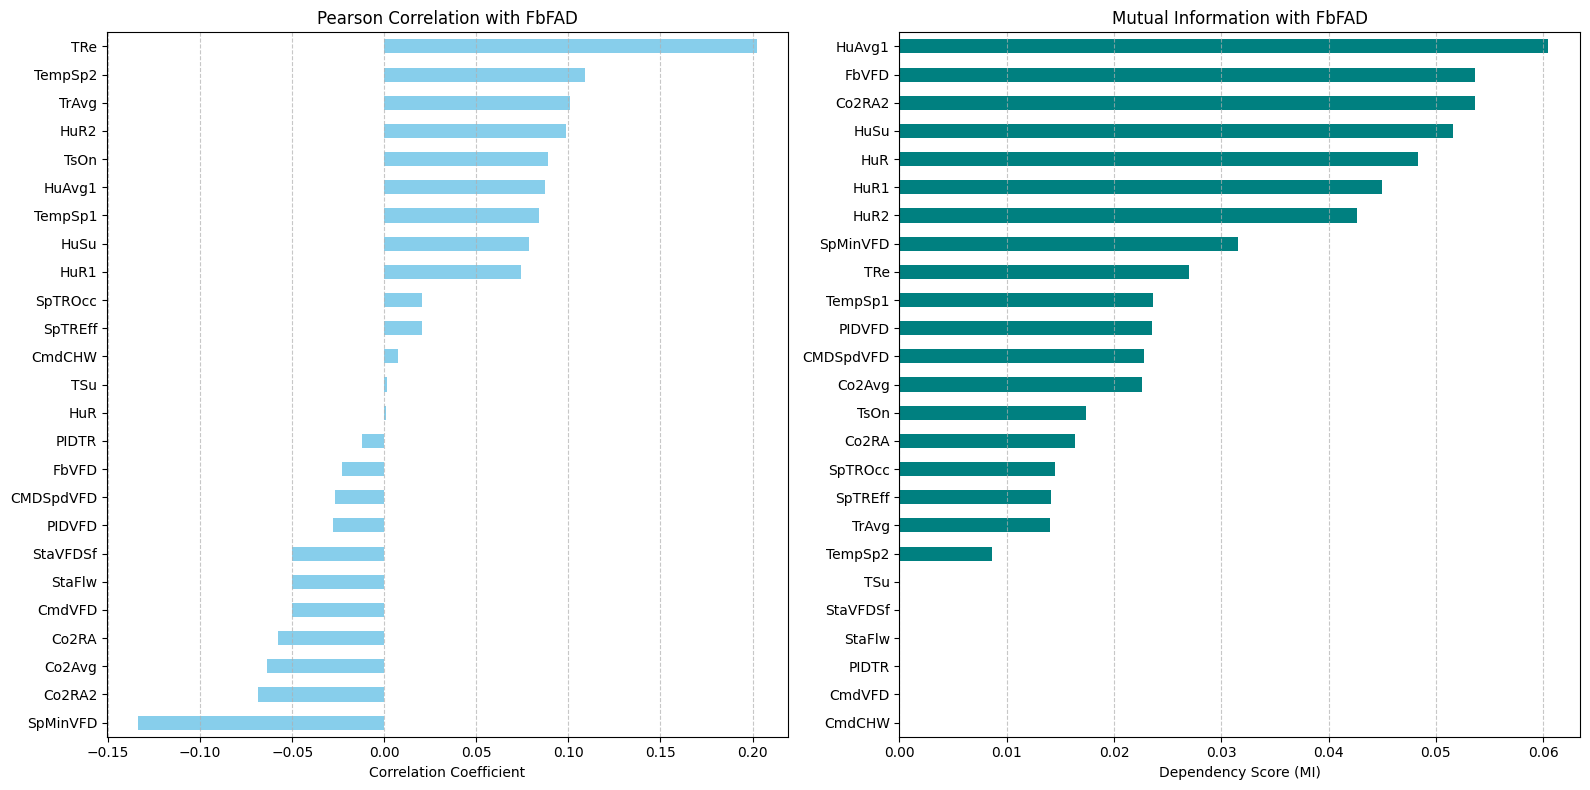

In [262]:
from sklearn.feature_selection import mutual_info_regression

# 1. Load Data
df = main_df.copy()

# 2. Inspect and Preprocess
# Check for basic info
print(df.info())

# Drop rows with missing target 'FbFAD' if any
df = df.dropna(subset=['FbFAD'])

# Fill other missing values if necessary, or drop. 
# For simplicity and robustness in this analysis, let's drop rows with any NaNs first.
# If too much data is lost, we can impute.
df = df.dropna()

# Ensure all columns are numeric. 
# The snippet shows all look numeric, but let's select only numeric columns just in case.
df = df.select_dtypes(include=[np.number])

# Separate Target and Features
target_col = 'FbFAD'
X = df.drop(columns=[target_col])
y = df[target_col]

# 3. Calculate Correlation (Pearson)
corr_matrix = df.corr()
# Get correlation with the target variable
target_corr = corr_matrix[target_col].drop(target_col)

# 4. Calculate Mutual Information
# Ensure X is discrete or continuous correctly. MI regression assumes continuous.
# Random state for reproducibility
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns)

# 5. Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot A: Correlation with Target
# Sorting for better visualization
sorted_corr = target_corr.sort_values(ascending=True)
sorted_corr.plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title(f'Pearson Correlation with {target_col}')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot B: Mutual Information Scores
sorted_mi = mi_series.sort_values(ascending=True)
sorted_mi.plot(kind='barh', color='teal', ax=axes[1])
axes[1].set_title(f'Mutual Information with {target_col}')
axes[1].set_xlabel('Dependency Score (MI)')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('ahu_correlation_mi_analysis.png')

# 6. Identify Best Features
best_corr_feature = target_corr.abs().idxmax()
best_corr_val = target_corr.abs().max()
best_mi_feature = mi_series.idxmax()
best_mi_val = mi_series.max()

print(f"Best Feature by Correlation (Absolute): {best_corr_feature} ({best_corr_val:.4f})")
print(f"Best Feature by Mutual Information: {best_mi_feature} ({best_mi_val:.4f})")

# Top 5 for each
print("\nTop 5 Correlated Features:")
print(target_corr.abs().sort_values(ascending=False).head(5))

print("\nTop 5 Mutual Information Features:")

In [263]:
main_df.columns

Index(['CMDSpdVFD', 'CmdCHW', 'CmdVFD', 'Co2Avg', 'Co2RA', 'Co2RA2', 'FbVFD',
       'HuAvg1', 'HuR', 'HuR1', 'HuR2', 'HuSu', 'PIDTR', 'PIDVFD', 'SpMinVFD',
       'SpTREff', 'SpTROcc', 'StaFlw', 'StaVFDSf', 'TRe', 'TSu', 'TempSp1',
       'TempSp2', 'TrAvg', 'TsOn', 'FbFAD'],
      dtype='object')

In [264]:
main_df["FbVFD"] = main_df["FbVFD"].round(1)

In [265]:
main_df["FbVFD"].value_counts()

FbVFD
0.0      158
51.1      83
81.0      78
100.9     78
81.1      75
        ... 
86.3       1
91.8       1
89.7       1
95.5       1
54.1       1
Name: count, Length: 162, dtype: int64

In [266]:
bacnet_map = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\bacnet_values.csv")

In [267]:
bacnet_map["datapoint"] = bacnet_map["object_name"].astype(str).str.split("'").str[-1]


In [268]:
bacnet_map["equipment_id"] = bacnet_map["object_name"].astype(str).str.split("'").str[-2]

In [269]:
bacnet_map[bacnet_map["equipment_id"]=="Ahu1"]

,object_name,data_received_on,description,device_id,ismanual,object_id,object_type,present_value,units,datapoint,equipment_id
94,VOX'OS01'Ahu'Ahu1'TRe,2025-11-07T11:06:56.469 UTC,Return Air Temperature,2122753,False,80,analogInput,23.385000228881836,degreesCelsius,TRe,Ahu1
131,VOX'OS01'Ahu'Ahu1'SpFAD,2025-11-07T11:06:56.469 UTC,FA. Damper Open Setpoint for Normal,2122753,False,4,analogValue,80,percent,SpFAD,Ahu1
144,VOX'OS01'Ahu'Ahu1'TempSp2,2025-11-07T11:06:56.469 UTC,Space Air Temperature-2,2122753,False,87,analogInput,19.81999969482422,degreesCelsius,TempSp2,Ahu1
146,VOX'OS01'Ahu'Ahu1'Almbag,2025-11-07T11:06:56.469 UTC,Bag Filter Alarm,2122753,False,3,binaryInput,inactive,NaN,Almbag,Ahu1
260,VOX'OS01'Ahu'Ahu1'TBHuSu,2025-11-07T11:06:56.469 UTC,Trend Supply Air Humidity,2122753,False,7,trendLog,NaN,NaN,TBHuSu,Ahu1
...,...,...,...,...,...,...,...,...,...,...,...
1942,VOX'OS01'Ahu'Ahu1'ChwTemp,2025-11-07T11:06:56.469 UTC,Chilled Water Return Temperature,2122753,False,2,analogInput,NaN,degreesCelsius,ChwTemp,Ahu1
2035,VOX'OS01'Ahu'Ahu1'FbFAD,2025-11-07T11:06:56.469 UTC,Fresh Air Damper Feedback,2122753,False,4,analogInput,79.0999984741211,percent,FbFAD,Ahu1
2036,VOX'OS01'Ahu'Ahu1'AlmRACoHi,2025-11-07T11:06:56.469 UTC,Space Air High Co2 Alarm,2122753,False,4,binaryValue,inactive,NaN,AlmRACoHi,Ahu1
2082,VOX'OS01'Ahu'Ahu1'TSOcc,2025-11-07T11:06:56.469 UTC,Time Scheduler - Occupancy,2122753,False,1,schedule,1,NaN,TSOcc,Ahu1


In [270]:
# Filter bacnet_map for Ahu1 equipment first
bacnet_map_ahu1 = bacnet_map[bacnet_map["equipment_id"] == "Ahu1"]

# Now join with the filtered bacnet_map, specifying suffixes for overlapping columns
ahu1_df_with_descriptions = ahu1_df.join(
    bacnet_map_ahu1.set_index("datapoint"),
    on="datapoint",
    how="left",
    rsuffix="_bacnet"
)
ahu1_df_with_descriptions

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,...,object_name_bacnet,data_received_on_bacnet,description,device_id_bacnet,ismanual,object_id,object_type,present_value,units,equipment_id_bacnet
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-11-17 08:08:45.711,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 08:08:45.711000+00:00,...,VOX'OS01'Ahu'Ahu1'PIDTR,2025-11-07T11:06:56.469 UTC,PID - Control For Room Temperature,2122753,False,1,loop,NaN,NaN,Ahu1
2025-11-17 07:50:15.664,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:50:15.664000+00:00,...,VOX'OS01'Ahu'Ahu1'PIDTR,2025-11-07T11:06:56.469 UTC,PID - Control For Room Temperature,2122753,False,1,loop,NaN,NaN,Ahu1
2025-11-17 07:29:30.980,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:29:30.980000+00:00,...,VOX'OS01'Ahu'Ahu1'PIDTR,2025-11-07T11:06:56.469 UTC,PID - Control For Room Temperature,2122753,False,1,loop,NaN,NaN,Ahu1
2025-11-17 07:11:20.983,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:11:20.983000+00:00,...,VOX'OS01'Ahu'Ahu1'PIDTR,2025-11-07T11:06:56.469 UTC,PID - Control For Room Temperature,2122753,False,1,loop,NaN,NaN,Ahu1
2025-11-17 06:54:58.361,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 06:54:58.361000+00:00,...,VOX'OS01'Ahu'Ahu1'PIDTR,2025-11-07T11:06:56.469 UTC,PID - Control For Room Temperature,2122753,False,1,loop,NaN,NaN,Ahu1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-07 11:06:56.469,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 11:06:56.469000+00:00,...,VOX'OS01'Ahu'Ahu1'FireAlm,2025-11-07T11:06:56.469 UTC,Fire Alarm From FACP,2122753,False,139,binaryInput,inactive,NaN,Ahu1
2025-11-07 10:50:12.004,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 10:50:12.004000+00:00,...,VOX'OS01'Ahu'Ahu1'FireAlm,2025-11-07T11:06:56.469 UTC,Fire Alarm From FACP,2122753,False,139,binaryInput,inactive,NaN,Ahu1
2025-11-07 10:33:47.450,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 10:33:47.450000+00:00,...,VOX'OS01'Ahu'Ahu1'FireAlm,2025-11-07T11:06:56.469 UTC,Fire Alarm From FACP,2122753,False,139,binaryInput,inactive,NaN,Ahu1


In [271]:
ahu1_df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,,
2025-11-17 08:08:45.711,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 08:08:45.711000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:50:15.664,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:50:15.664000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:29:30.980,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:29:30.980000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:11:20.983,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:11:20.983000+00:00,PIDTR,0,TBD,-,-
2025-11-17 06:54:58.361,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 06:54:58.361000+00:00,PIDTR,0,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-07 11:06:56.469,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 11:06:56.469000+00:00,FireAlm,inactive,TBD,-,-
2025-11-07 10:50:12.004,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 10:50:12.004000+00:00,FireAlm,inactive,TBD,-,-
2025-11-07 10:33:47.450,OS01-AHU-01FireAlm,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'FireAlm,Ahu1,Ahu1,2025-11-07 10:33:47.450000+00:00,FireAlm,inactive,TBD,-,-


In [272]:
ahu1_df.head()

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,,
2025-11-17 08:08:45.711,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 08:08:45.711000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:50:15.664,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:50:15.664000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:29:30.980,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:29:30.980000+00:00,PIDTR,0,TBD,-,-
2025-11-17 07:11:20.983,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 07:11:20.983000+00:00,PIDTR,0,TBD,-,-
2025-11-17 06:54:58.361,OS01-AHU-01PIDTR,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'PIDTR,Ahu1,Ahu1,2025-11-17 06:54:58.361000+00:00,PIDTR,0,TBD,-,-


In [273]:
main_df

,CMDSpdVFD,CmdCHW,CmdVFD,Co2Avg,Co2RA,Co2RA2,FbVFD,HuAvg1,HuR,HuR1,...,SpTROcc,StaFlw,StaVFDSf,TRe,TSu,TempSp1,TempSp2,TrAvg,TsOn,FbFAD
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-11-07 10:17:20.315,80.0,0.0,0,436.500000,389.800018,479.800018,81.1,61.244995,50.809998,56.980000,...,21,0,0,23.160000,22.455000,20.129999,18.834999,19.507500,1,79.099998
2025-11-07 10:33:47.450,80.0,0.0,0,443.799988,399.800018,484.000000,81.0,59.674995,50.009998,55.369999,...,21,0,0,23.184999,22.500000,20.490000,19.299999,19.959999,1,79.099998
2025-11-07 10:50:12.004,80.0,0.0,0,441.400024,398.000000,483.000000,81.0,58.654999,48.939999,53.449997,...,21,0,0,23.344999,22.510000,21.119999,19.590000,20.264999,1,79.099998
2025-11-07 11:06:56.469,80.0,0.0,0,446.500000,404.200012,486.000000,81.0,57.049995,47.980000,51.689999,...,21,0,0,23.385000,22.600000,21.170000,19.820000,20.504999,1,79.099998
2025-11-07 11:23:06.602,80.0,0.0,0,451.700012,408.000000,492.000000,81.1,56.794998,48.610001,51.599998,...,21,0,0,23.400000,22.609999,21.369999,19.980000,20.684999,1,79.099998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17 06:54:58.361,50.0,0.0,0,460.000000,429.000000,492.000000,51.1,72.214996,62.820000,67.580002,...,22,0,0,24.539999,22.389999,21.879999,21.135000,21.525000,1,79.220001
2025-11-17 07:11:20.983,50.0,0.0,0,455.600006,429.600006,490.000000,51.1,71.680000,60.899998,66.409996,...,22,0,0,24.670000,22.424999,21.969999,21.139999,21.555000,1,79.199997
2025-11-17 07:29:30.980,50.0,0.0,0,449.500000,415.000000,484.000000,51.1,70.889999,59.099998,65.040001,...,22,0,0,24.840000,22.559999,22.049999,21.135000,21.602501,1,79.199997


In [274]:
import requests
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 25.357,
    "longitude": 55.403,
    "start_date": "2025-11-07",
    "end_date": "2025-11-07",
    "hourly": ["temperature_2m", "relative_humidity_2m"],
    "timezone": "UTC" # Matching your data's timezone
}

response = requests.get(url, params=params)
weather_json = response.json()

# 3. PROCESS: Create a clean Weather DataFrame
weather_df = pd.DataFrame({
    'timestamp_weather': pd.to_datetime(weather_json['hourly']['time']),
    'Outdoor_Temp': weather_json['hourly']['temperature_2m'],
    'Outdoor_Hum': weather_json['hourly']['relative_humidity_2m']
})

In [275]:
weather_df

,timestamp_weather,Outdoor_Temp,Outdoor_Hum
0,2025-11-07 00:00:00,21.9,54
1,2025-11-07 01:00:00,21.7,55
2,2025-11-07 02:00:00,21.1,59
3,2025-11-07 03:00:00,20.9,60
4,2025-11-07 04:00:00,22.5,51
5,2025-11-07 05:00:00,25.8,36
6,2025-11-07 06:00:00,29.0,27
7,2025-11-07 07:00:00,31.0,18
8,2025-11-07 08:00:00,31.9,15
9,2025-11-07 09:00:00,32.5,15


## Fetch Weather Data and Merge with main_df

We'll fetch historical weather data for the timestamps in main_df and merge temperature and humidity.

In [276]:
# Step 1: Get timestamps from pivoted_table (which has the original timestamps)
# pivoted_table has timestamp as index
timestamps_df = pivoted_table.reset_index()[['timestamp']].copy()
timestamps_df['timestamp'] = pd.to_datetime(timestamps_df['timestamp'])

print(f"Date range in data: {timestamps_df['timestamp'].min()} to {timestamps_df['timestamp'].max()}")
print(f"Total timestamps: {len(timestamps_df)}")
timestamps_df.head()

Date range in data: 2025-11-07 10:17:20.315000 to 2025-11-17 08:08:45.711000
Total timestamps: 816


datapoint,timestamp
0,2025-11-07 10:17:20.315
1,2025-11-07 10:33:47.450
2,2025-11-07 10:50:12.004
3,2025-11-07 11:06:56.469
4,2025-11-07 11:23:06.602


In [277]:
# Step 2: Function to fetch weather data for a date range
import requests
from datetime import datetime, timedelta

def fetch_weather_data(start_date, end_date, latitude=25.357, longitude=55.403):
    """
    Fetch historical weather data from Open-Meteo API
    
    Args:
        start_date: Start date (YYYY-MM-DD format or datetime)
        end_date: End date (YYYY-MM-DD format or datetime)
        latitude: Location latitude (default: Dubai)
        longitude: Location longitude (default: Dubai)
    
    Returns:
        DataFrame with timestamp, temperature, and humidity
    """
    # Convert to string format if datetime objects
    if isinstance(start_date, datetime):
        start_date = start_date.strftime('%Y-%m-%d')
    if isinstance(end_date, datetime):
        end_date = end_date.strftime('%Y-%m-%d')
    
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "hourly": ["temperature_2m", "relative_humidity_2m"],
        "timezone": "UTC"
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        weather_json = response.json()
        
        # Create DataFrame
        weather_df = pd.DataFrame({
            'timestamp': pd.to_datetime(weather_json['hourly']['time']),
            'outdoor_temp': weather_json['hourly']['temperature_2m'],
            'outdoor_humidity': weather_json['hourly']['relative_humidity_2m']
        })
        
        return weather_df
    
    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

print("Weather data fetch function created successfully!")

Weather data fetch function created successfully!


In [278]:
# Step 3: Fetch weather data for the date range in our data
min_date = timestamps_df['timestamp'].min()
max_date = timestamps_df['timestamp'].max()

print(f"Fetching weather data from {min_date.date()} to {max_date.date()}...")

weather_full_df = fetch_weather_data(
    start_date=min_date,
    end_date=max_date,
    latitude=25.357,  # Dubai coordinates
    longitude=55.403
)

if weather_full_df is not None:
    print(f"Successfully fetched {len(weather_full_df)} hourly weather records")
    print(f"Weather data range: {weather_full_df['timestamp'].min()} to {weather_full_df['timestamp'].max()}")
    display(weather_full_df.head())
    display(weather_full_df.tail())
else:
    print("Failed to fetch weather data")

Fetching weather data from 2025-11-07 to 2025-11-17...
Successfully fetched 264 hourly weather records
Weather data range: 2025-11-07 00:00:00 to 2025-11-17 23:00:00
Successfully fetched 264 hourly weather records
Weather data range: 2025-11-07 00:00:00 to 2025-11-17 23:00:00


,timestamp,outdoor_temp,outdoor_humidity
0,2025-11-07 00:00:00,21.9,54
1,2025-11-07 01:00:00,21.7,55
2,2025-11-07 02:00:00,21.1,59
3,2025-11-07 03:00:00,20.9,60
4,2025-11-07 04:00:00,22.5,51


,timestamp,outdoor_temp,outdoor_humidity
259,2025-11-17 19:00:00,24.1,64
260,2025-11-17 20:00:00,23.5,67
261,2025-11-17 21:00:00,22.5,70
262,2025-11-17 22:00:00,21.9,69
263,2025-11-17 23:00:00,21.3,70


In [279]:
# Step 4: Merge weather data with timestamps using merge_asof for nearest timestamp matching
# This handles cases where BMS data timestamps don't exactly match hourly weather data

# Ensure both are sorted by timestamp
timestamps_df = timestamps_df.sort_values('timestamp')
weather_full_df = weather_full_df.sort_values('timestamp')

# Use merge_asof to find nearest weather reading for each BMS timestamp
# direction='nearest' finds the closest match (could be before or after)
merged_weather = pd.merge_asof(
    timestamps_df,
    weather_full_df,
    on='timestamp',
    direction='nearest',
    tolerance=pd.Timedelta('1 hour')  # Only match if within 1 hour
)

print(f"Merged {len(merged_weather)} records")
print(f"Records with weather data: {merged_weather['outdoor_temp'].notna().sum()}")
print(f"Records missing weather data: {merged_weather['outdoor_temp'].isna().sum()}")

# Display sample
merged_weather.head(10)

Merged 816 records
Records with weather data: 816
Records missing weather data: 0


,timestamp,outdoor_temp,outdoor_humidity
0,2025-11-07 10:17:20.315,32.8,14
1,2025-11-07 10:33:47.450,31.6,24
2,2025-11-07 10:50:12.004,31.6,24
3,2025-11-07 11:06:56.469,31.6,24
4,2025-11-07 11:23:06.602,31.6,24
5,2025-11-07 11:37:27.586,31.2,28
6,2025-11-07 11:54:06.002,31.2,28
7,2025-11-07 12:10:29.305,31.2,28
8,2025-11-07 12:29:08.119,31.2,28
9,2025-11-07 12:45:13.230,29.1,43


In [280]:
# Step 5: Add weather data to main_df
# main_df doesn't have timestamp as it was created from pivoted data after dropping timestamp
# We need to add it back based on the index alignment

# Create a copy of main_df and add weather columns
main_df_with_weather = main_df.copy()

# Add outdoor temperature and humidity columns
main_df_with_weather['outdoor_temp'] = merged_weather['outdoor_temp'].values
main_df_with_weather['outdoor_humidity'] = merged_weather['outdoor_humidity'].values

print(f"Original main_df shape: {main_df.shape}")
print(f"main_df with weather shape: {main_df_with_weather.shape}")
print(f"\nNew columns added: outdoor_temp, outdoor_humidity")
print(f"\nWeather data statistics:")
print(main_df_with_weather[['outdoor_temp', 'outdoor_humidity']].describe())

main_df_with_weather.head()

Original main_df shape: (816, 26)
main_df with weather shape: (816, 28)

New columns added: outdoor_temp, outdoor_humidity

Weather data statistics:
       outdoor_temp  outdoor_humidity
count    816.000000        816.000000
mean      26.073652         49.393382
std        3.245830         12.277004
min       20.500000         14.000000
25%       22.900000         40.000000
50%       26.300000         50.000000
75%       28.900000         58.000000
max       32.800000         78.000000


,CMDSpdVFD,CmdCHW,CmdVFD,Co2Avg,Co2RA,Co2RA2,FbVFD,HuAvg1,HuR,HuR1,...,StaVFDSf,TRe,TSu,TempSp1,TempSp2,TrAvg,TsOn,FbFAD,outdoor_temp,outdoor_humidity
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-11-07 10:17:20.315,80.0,0.0,0,436.500000,389.800018,479.800018,81.1,61.244995,50.809998,56.980000,...,0,23.160000,22.455000,20.129999,18.834999,19.507500,1,79.099998,32.8,14
2025-11-07 10:33:47.450,80.0,0.0,0,443.799988,399.800018,484.000000,81.0,59.674995,50.009998,55.369999,...,0,23.184999,22.500000,20.490000,19.299999,19.959999,1,79.099998,31.6,24
2025-11-07 10:50:12.004,80.0,0.0,0,441.400024,398.000000,483.000000,81.0,58.654999,48.939999,53.449997,...,0,23.344999,22.510000,21.119999,19.590000,20.264999,1,79.099998,31.6,24
2025-11-07 11:06:56.469,80.0,0.0,0,446.500000,404.200012,486.000000,81.0,57.049995,47.980000,51.689999,...,0,23.385000,22.600000,21.170000,19.820000,20.504999,1,79.099998,31.6,24
2025-11-07 11:23:06.602,80.0,0.0,0,451.700012,408.000000,492.000000,81.1,56.794998,48.610001,51.599998,...,0,23.400000,22.609999,21.369999,19.980000,20.684999,1,79.099998,31.6,24


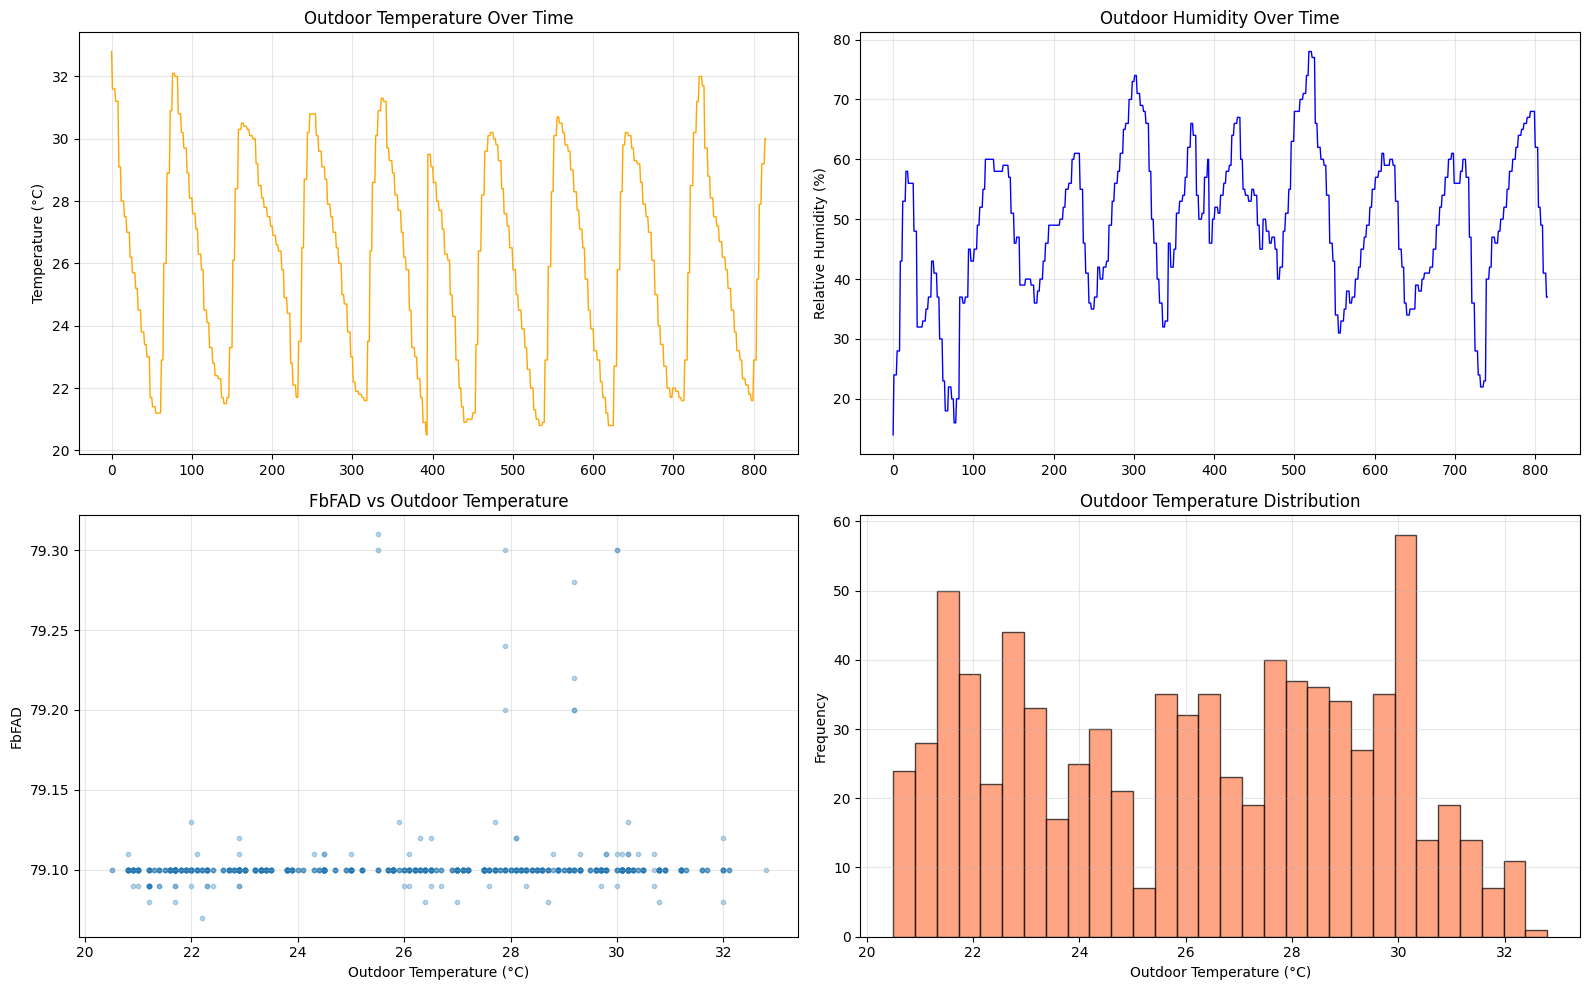

Weather data visualization saved as 'weather_data_analysis.png'


In [281]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax1 = axes[0, 0]
ax1.plot(merged_weather.index, merged_weather['outdoor_temp'], color='orange', linewidth=1)
ax1.set_title('Outdoor Temperature Over Time')
ax1.set_ylabel('Temperature (°C)')
ax1.grid(True, alpha=0.3)

# Plot 2: Outdoor Humidity over time
ax2 = axes[0, 1]
ax2.plot(merged_weather.index, merged_weather['outdoor_humidity'], color='blue', linewidth=1)
ax2.set_title('Outdoor Humidity Over Time')
ax2.set_ylabel('Relative Humidity (%)')
ax2.grid(True, alpha=0.3)

# Plot 3: Correlation between outdoor temp and FbFAD
ax3 = axes[1, 0]
ax3.scatter(main_df_with_weather['outdoor_temp'], main_df_with_weather['FbFAD'], alpha=0.3, s=10)
ax3.set_xlabel('Outdoor Temperature (°C)')
ax3.set_ylabel('FbFAD')
ax3.set_title('FbFAD vs Outdoor Temperature')
ax3.grid(True, alpha=0.3)

# Plot 4: Temperature distribution
ax4 = axes[1, 1]
ax4.hist(main_df_with_weather['outdoor_temp'].dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Outdoor Temperature (°C)')
ax4.set_ylabel('Frequency')
ax4.set_title('Outdoor Temperature Distribution')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('weather_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Weather data visualization saved as 'weather_data_analysis.png'")

In [282]:
# Step 7: Save the enhanced dataset with weather data
main_df_with_weather.reset_index().to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_model_data_with_weather.csv", index=False)
print("Enhanced dataset saved to: ahu1_model_data_with_weather.csv")

print(f"\nFinal Dataset Summary:")
print(f"Shape: {main_df_with_weather.shape}")
print(f"Columns: {list(main_df_with_weather.columns)}")
print(f"\nMissing values:")
print(main_df_with_weather.isnull().sum()[main_df_with_weather.isnull().sum() > 0])

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_model_data_with_weather.csv'

In [ ]:
created_df = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_model_data_with_weather.csv")

In [ ]:
created_df

,timestamp,CMDSpdVFD,CmdCHW,CmdVFD,Co2Avg,Co2RA,Co2RA2,FbVFD,HuAvg1,HuR,...,StaVFDSf,TRe,TSu,TempSp1,TempSp2,TrAvg,TsOn,FbFAD,outdoor_temp,outdoor_humidity
0,2025-11-07 10:17:20.315,80.0,0.0,0,436.500000,389.800018,479.800018,81.1,61.244995,50.809998,...,0,23.160000,22.455000,20.129999,18.834999,19.507500,1,79.099998,32.8,14
1,2025-11-07 10:33:47.450,80.0,0.0,0,443.799988,399.800018,484.000000,81.0,59.674995,50.009998,...,0,23.184999,22.500000,20.490000,19.299999,19.959999,1,79.099998,31.6,24
2,2025-11-07 10:50:12.004,80.0,0.0,0,441.400024,398.000000,483.000000,81.0,58.654999,48.939999,...,0,23.344999,22.510000,21.119999,19.590000,20.264999,1,79.099998,31.6,24
3,2025-11-07 11:06:56.469,80.0,0.0,0,446.500000,404.200012,486.000000,81.0,57.049995,47.980000,...,0,23.385000,22.600000,21.170000,19.820000,20.504999,1,79.099998,31.6,24
4,2025-11-07 11:23:06.602,80.0,0.0,0,451.700012,408.000000,492.000000,81.1,56.794998,48.610001,...,0,23.400000,22.609999,21.369999,19.980000,20.684999,1,79.099998,31.6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2025-11-17 06:54:58.361,50.0,0.0,0,460.000000,429.000000,492.000000,51.1,72.214996,62.820000,...,0,24.539999,22.389999,21.879999,21.135000,21.525000,1,79.220001,29.2,41
812,2025-11-17 07:11:20.983,50.0,0.0,0,455.600006,429.600006,490.000000,51.1,71.680000,60.899998,...,0,24.670000,22.424999,21.969999,21.139999,21.555000,1,79.199997,29.2,41
813,2025-11-17 07:29:30.980,50.0,0.0,0,449.500000,415.000000,484.000000,51.1,70.889999,59.099998,...,0,24.840000,22.559999,22.049999,21.135000,21.602501,1,79.199997,29.2,41
814,2025-11-17 07:50:15.664,50.0,0.0,0,441.400024,407.200012,480.800018,51.2,70.179993,58.000000,...,0,24.939999,22.469999,22.129999,21.154999,21.630001,1,79.299995,30.0,37


In [ ]:
ahu1_map = bacnet_map[bacnet_map["equipment_id"] == "Ahu1"]

In [ ]:
req = ahu1_map[["description","datapoint"]].head(50)
req

,description,datapoint
94,Return Air Temperature,TRe
131,FA. Damper Open Setpoint for Normal,SpFAD
144,Space Air Temperature-2,TempSp2
146,Bag Filter Alarm,Almbag
260,Trend Supply Air Humidity,TBHuSu
280,Space Air Humidity Setpoint,SpHuR
303,FAD Fail to Open Alarm,AlmFAD
352,PID - Control For VFD,PIDVFD
361,Space Air Co2-2,Co2RA2
373,Room Temperature Effective Setpoint,SpTREff


In [ ]:
req[req["datapoint"].str.contains("temp", case=False)]

,description,datapoint
144,Space Air Temperature-2,TempSp2


In [284]:
pivoted_table.to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_pivoted_data.csv",index=False)

In [ ]:
pivoted_table["TrAvg"]= pd.to_numeric(pivoted_table["TrAvg"], errors='ignore')

C:\Users\debas\AppData\Local\Temp\ipykernel_26068\4073291588.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  pivoted_table["TrAvg"]= pd.to_numeric(pivoted_table["TrAvg"], errors='ignore')


In [ ]:
pivoted_table["TrAvg"].describe()

count    816.000000
mean      20.652245
std        1.146121
min       17.110001
25%       19.944375
50%       20.916249
75%       21.543750
max       22.677500
Name: TrAvg, dtype: float64

In [ ]:
created_df[['outdoor_temp', 'outdoor_humidity', 'TrAvg', 'HuAvg1']]

,outdoor_temp,outdoor_humidity,TrAvg,HuAvg1
0,32.8,14,19.507500,61.244995
1,31.6,24,19.959999,59.674995
2,31.6,24,20.264999,58.654999
3,31.6,24,20.504999,57.049995
4,31.6,24,20.684999,56.794998
...,...,...,...,...
811,29.2,41,21.525000,72.214996
812,29.2,41,21.555000,71.680000
813,29.2,41,21.602501,70.889999
814,30.0,37,21.630001,70.179993


## LSTM Model Training: Predict TrAvg and HuAvg1 from Weather Data

Train an LSTM model using outdoor temperature and humidity to predict indoor temperature (TrAvg) and humidity (HuAvg1).

In [ ]:
# Step 1: Prepare the dataset for LSTM training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and targets from created_df
features = ['outdoor_temp', 'outdoor_humidity']
targets = ['TrAvg', 'HuAvg1']

# Create a clean dataset with no missing values
lstm_df = created_df[features + targets].copy()
lstm_df = lstm_df.dropna()

print(f"Dataset shape after removing NaN: {lstm_df.shape}")
print(f"\nDataset statistics:")
print(lstm_df.describe())
print(f"\nFeatures: {features}")
print(f"Targets: {targets}")

lstm_df.head()

Dataset shape after removing NaN: (816, 4)

Dataset statistics:
       outdoor_temp  outdoor_humidity       TrAvg      HuAvg1
count    816.000000        816.000000  816.000000  816.000000
mean      26.073652         49.393382   20.652245   68.645838
std        3.245830         12.277004    1.146121    5.354510
min       20.500000         14.000000   17.110001   47.154999
25%       22.900000         40.000000   19.944375   66.473747
50%       26.300000         50.000000   20.916249   69.174995
75%       28.900000         58.000000   21.543750   71.667500
max       32.800000         78.000000   22.677500   85.489998

Features: ['outdoor_temp', 'outdoor_humidity']
Targets: ['TrAvg', 'HuAvg1']


,outdoor_temp,outdoor_humidity,TrAvg,HuAvg1
0,32.8,14,19.507500,61.244995
1,31.6,24,19.959999,59.674995
2,31.6,24,20.264999,58.654999
3,31.6,24,20.504999,57.049995
4,31.6,24,20.684999,56.794998


In [ ]:
# Step 2: Scale the features and targets
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the features and targets
df_features = feature_scaler.fit_transform(lstm_df[features])
df_targets = target_scaler.fit_transform(lstm_df[targets])

print(f"Features shape after scaling: {df_features.shape}")
print(f"Targets shape after scaling: {df_targets.shape}")
print("\nScaling complete!")

Features shape after scaling: (816, 2)
Targets shape after scaling: (816, 2)

Scaling complete!


In [ ]:
# Step 3: Create sequences for LSTM
timesteps = 24  # Use 24 previous timesteps to predict the next value

X = []
y = []

for i in range(len(df_features) - timesteps):
    # Create sequence of features (outdoor_temp and outdoor_humidity)
    feature_seq = df_features[i:(i + timesteps)]
    X.append(feature_seq)
    
    # Target is the next value after the sequence (TrAvg and HuAvg1)
    target = df_targets[i + timesteps]
    y.append(target)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Print shapes to verify
print(f"X shape: {X.shape}")  # Should be (samples, timesteps, 2) - 2 features
print(f"y shape: {y.shape}")  # Should be (samples, 2) - 2 targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Testing set - X: {X_test.shape}, y: {y_test.shape}")

X shape: (792, 24, 2)
y shape: (792, 2)

Training set - X: (633, 24, 2), y: (633, 2)
Testing set - X: (159, 24, 2), y: (159, 2)


In [ ]:
# Step 4: Build the LSTM model
model = Sequential()
# LSTM layer to capture temporal dependencies from outdoor weather data
model.add(LSTM(50, activation='relu', input_shape=(timesteps, len(features))))
# Dense output layer with 2 neurons for TrAvg and HuAvg1 prediction
model.add(Dense(len(targets)))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

c:\Users\debas\OneDrive\Desktop\BMS-AI\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,702 (41.80 KB)

 Trainable params: 10,702 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Train the model
print("Training the LSTM model...")
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32,
    verbose=1, 
    validation_data=(X_test, y_test)
)

print("\nTraining complete!")

Training the LSTM model...
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2150 - mae: 0.4121 - val_loss: 0.0589 - val_mae: 0.1848
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2150 - mae: 0.4121 - val_loss: 0.0589 - val_mae: 0.1848
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0463 - mae: 0.1627 - val_loss: 0.0318 - val_mae: 0.1356
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0463 - mae: 0.1627 - val_loss: 0.0318 - val_mae: 0.1356
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0339 - mae: 0.1349 - val_loss: 0.0278 - val_mae: 0.1218
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0339 - mae: 0.1349 - val_loss: 0.0278 - val_mae: 0.1218
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0320 - mae: 0.1303 - val_loss: 0.0277 - val_mae: 0.1236
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0320 - mae: 0.1303 - val_loss: 0.0277 - val_mae: 0.1236
Epoch 5/100
20/20 ━━━━━━━━━━━

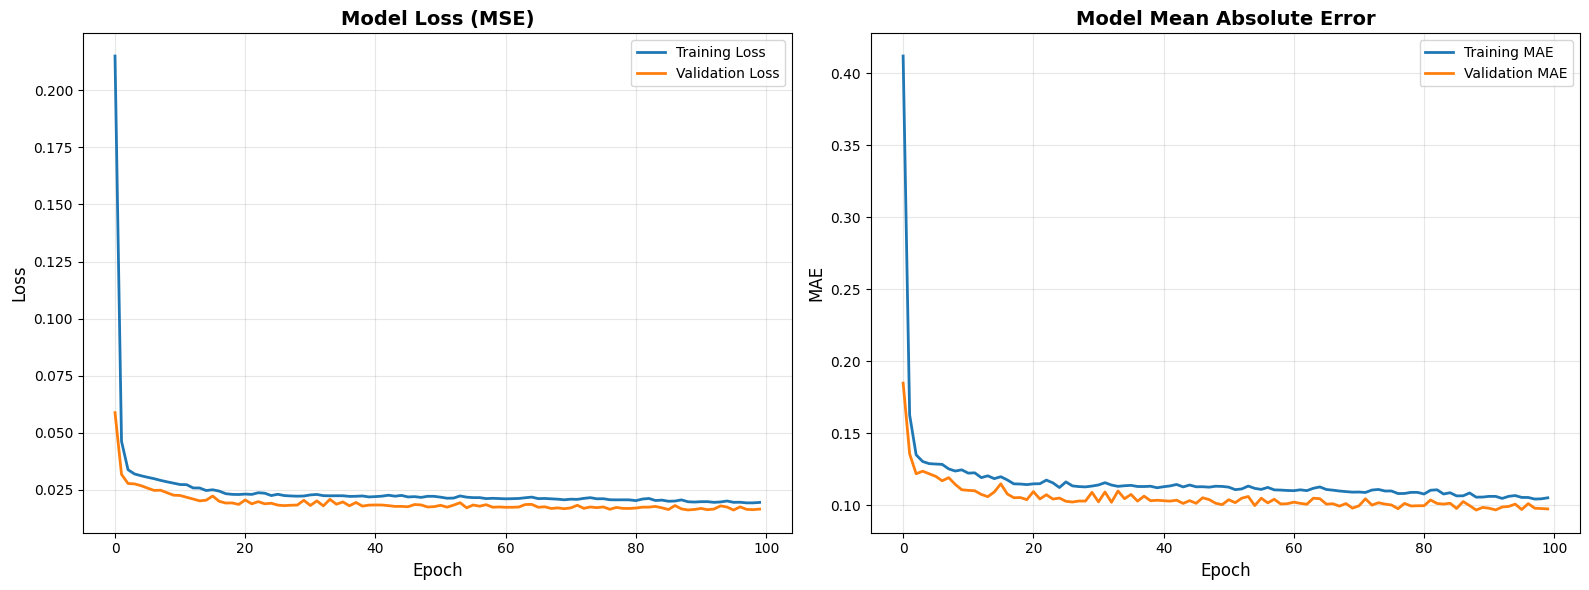

Training history plot saved as 'lstm_training_history.png'


In [ ]:
# Step 6: Plot training history
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss (MSE)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot MAE
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('Model Mean Absolute Error', fontsize=14, fontweight='bold')
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("Training history plot saved as 'lstm_training_history.png'")

In [ ]:
# Step 7: Make predictions and inverse transform to original scale
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_actual = target_scaler.inverse_transform(y_test)
y_pred_actual = target_scaler.inverse_transform(y_pred)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_travg = mean_squared_error(y_test_actual[:, 0], y_pred_actual[:, 0])
mae_travg = mean_absolute_error(y_test_actual[:, 0], y_pred_actual[:, 0])
r2_travg = r2_score(y_test_actual[:, 0], y_pred_actual[:, 0])

mse_huavg = mean_squared_error(y_test_actual[:, 1], y_pred_actual[:, 1])
mae_huavg = mean_absolute_error(y_test_actual[:, 1], y_pred_actual[:, 1])
r2_huavg = r2_score(y_test_actual[:, 1], y_pred_actual[:, 1])

print("=" * 60)
print("MODEL EVALUATION METRICS")
print("=" * 60)
print(f"\nTrAvg (Indoor Temperature) Prediction:")
print(f"  MSE: {mse_travg:.4f}")
print(f"  MAE: {mae_travg:.4f}")
print(f"  R² Score: {r2_travg:.4f}")

print(f"\nHuAvg1 (Indoor Humidity) Prediction:")
print(f"  MSE: {mse_huavg:.4f}")
print(f"  MAE: {mae_huavg:.4f}")
print(f"  R² Score: {r2_huavg:.4f}")
print("=" * 60)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MODEL EVALUATION METRICS

TrAvg (Indoor Temperature) Prediction:
  MSE: 0.8350
  MAE: 0.7278
  R² Score: 0.3392

HuAvg1 (Indoor Humidity) Prediction:
  MSE: 9.2656
  MAE: 2.4540
  R² Score: 0.6202
MODEL EVALUATION METRICS

TrAvg (Indoor Temperature) Prediction:
  MSE: 0.8350
  MAE: 0.7278
  R² Score: 0.3392

HuAvg1 (Indoor Humidity) Prediction:
  MSE: 9.2656
  MAE: 2.4540
  R² Score: 0.6202


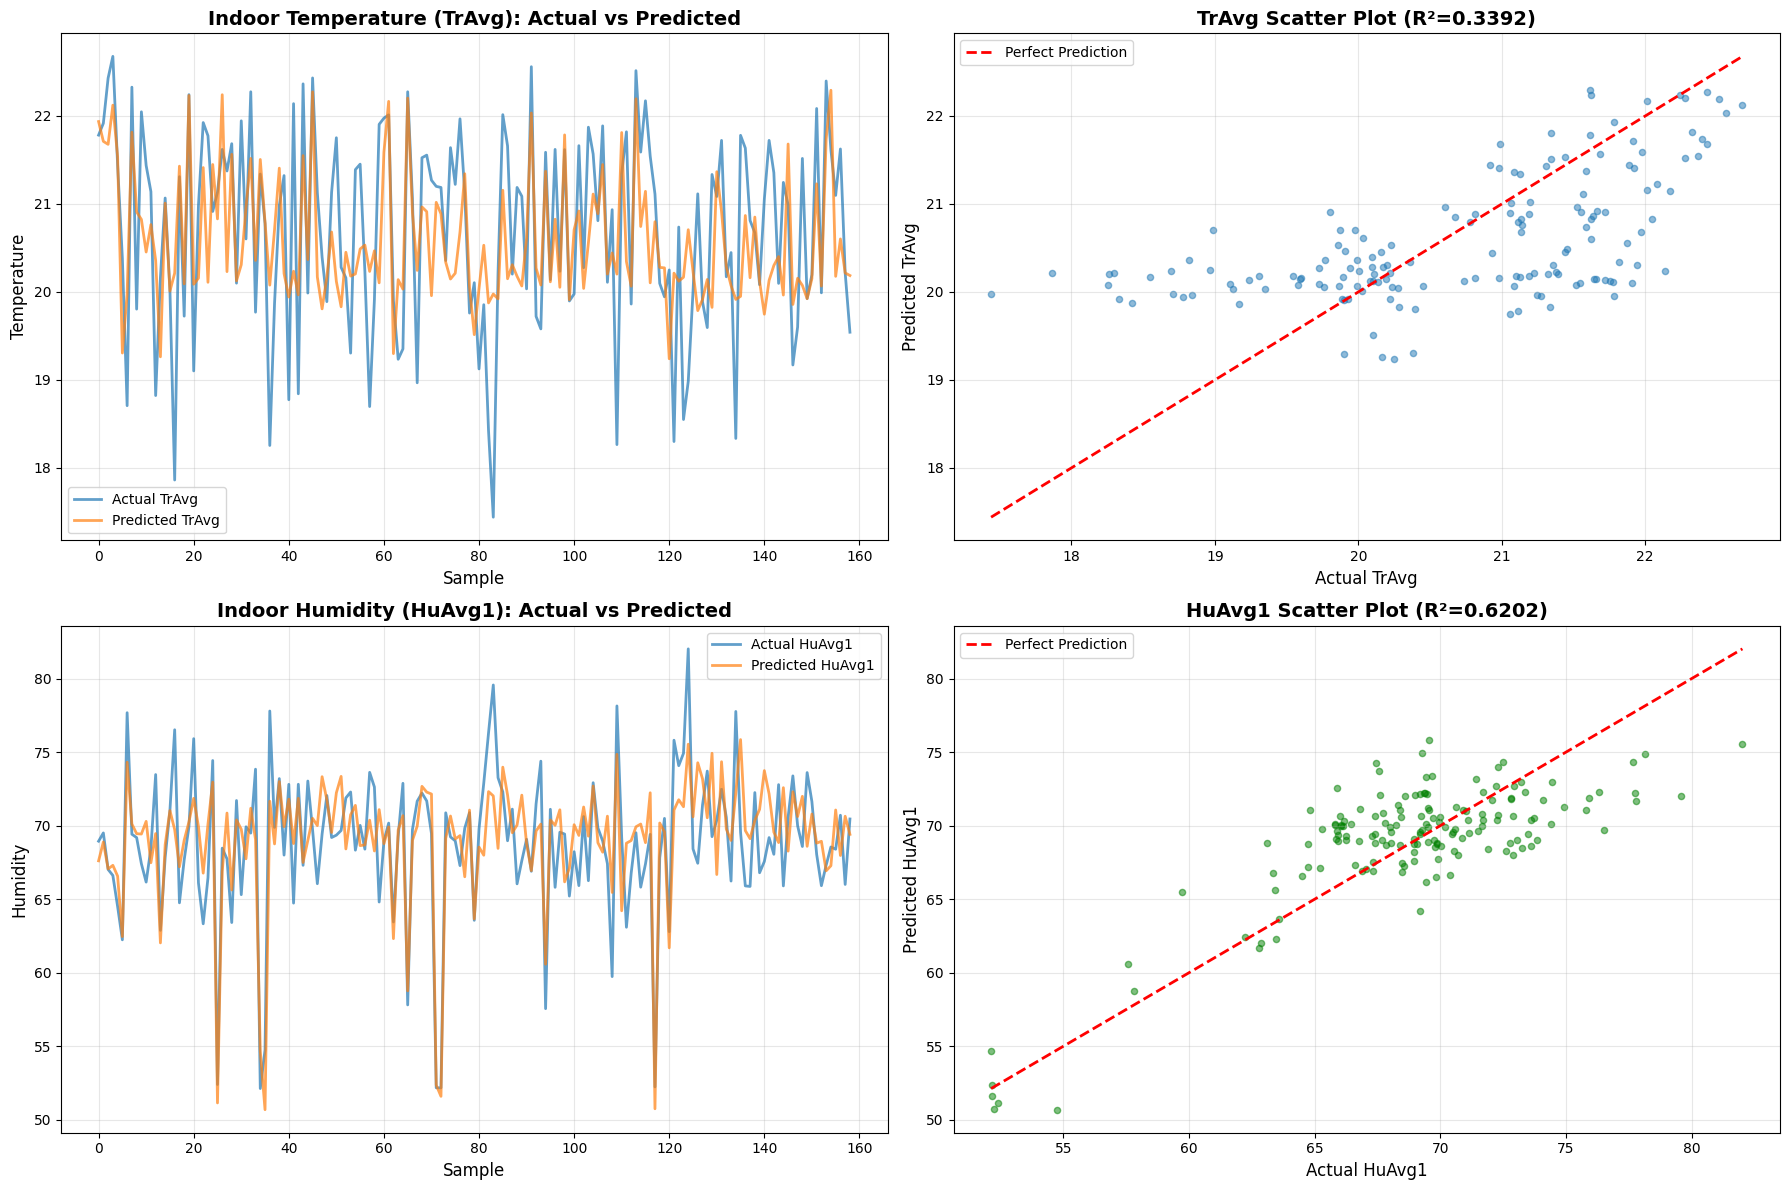

Prediction visualization saved as 'lstm_prediction_results.png'


In [ ]:
# Step 8: Visualize predictions vs actual values
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: TrAvg (Indoor Temperature) - Time Series
ax1 = axes[0, 0]
sample_size = min(200, len(y_test_actual))
ax1.plot(range(sample_size), y_test_actual[:sample_size, 0], label='Actual TrAvg', linewidth=2, alpha=0.7)
ax1.plot(range(sample_size), y_pred_actual[:sample_size, 0], label='Predicted TrAvg', linewidth=2, alpha=0.7)
ax1.set_title('Indoor Temperature (TrAvg): Actual vs Predicted', fontsize=14, fontweight='bold')
ax1.set_ylabel('Temperature', fontsize=12)
ax1.set_xlabel('Sample', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: TrAvg - Scatter Plot
ax2 = axes[0, 1]
ax2.scatter(y_test_actual[:, 0], y_pred_actual[:, 0], alpha=0.5, s=20)
ax2.plot([y_test_actual[:, 0].min(), y_test_actual[:, 0].max()], 
         [y_test_actual[:, 0].min(), y_test_actual[:, 0].max()], 
         'r--', linewidth=2, label='Perfect Prediction')
ax2.set_xlabel('Actual TrAvg', fontsize=12)
ax2.set_ylabel('Predicted TrAvg', fontsize=12)
ax2.set_title(f'TrAvg Scatter Plot (R²={r2_travg:.4f})', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: HuAvg1 (Indoor Humidity) - Time Series
ax3 = axes[1, 0]
ax3.plot(range(sample_size), y_test_actual[:sample_size, 1], label='Actual HuAvg1', linewidth=2, alpha=0.7)
ax3.plot(range(sample_size), y_pred_actual[:sample_size, 1], label='Predicted HuAvg1', linewidth=2, alpha=0.7)
ax3.set_title('Indoor Humidity (HuAvg1): Actual vs Predicted', fontsize=14, fontweight='bold')
ax3.set_ylabel('Humidity', fontsize=12)
ax3.set_xlabel('Sample', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: HuAvg1 - Scatter Plot
ax4 = axes[1, 1]
ax4.scatter(y_test_actual[:, 1], y_pred_actual[:, 1], alpha=0.5, s=20, color='green')
ax4.plot([y_test_actual[:, 1].min(), y_test_actual[:, 1].max()], 
         [y_test_actual[:, 1].min(), y_test_actual[:, 1].max()], 
         'r--', linewidth=2, label='Perfect Prediction')
ax4.set_xlabel('Actual HuAvg1', fontsize=12)
ax4.set_ylabel('Predicted HuAvg1', fontsize=12)
ax4.set_title(f'HuAvg1 Scatter Plot (R²={r2_huavg:.4f})', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_prediction_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("Prediction visualization saved as 'lstm_prediction_results.png'")

In [ ]:
# Step 9: Save the model and scalers
import joblib

# Save the LSTM model
model.save('C:\\Users\\debas\\OneDrive\\Desktop\\lstm_indoor_prediction_model.h5')
model.save('C:\\Users\\debas\\OneDrive\\Desktop\\lstm_indoor_prediction_model.keras')

# Save the scalers for future predictions
joblib.dump(feature_scaler, 'C:\\Users\\debas\\OneDrive\\Desktop\\feature_scaler.pkl')
joblib.dump(target_scaler, 'C:\\Users\\debas\\OneDrive\\Desktop\\target_scaler.pkl')

print("✓ Model saved as 'lstm_indoor_prediction_model.h5' and 'lstm_indoor_prediction_model.keras'")
print("✓ Feature scaler saved as 'feature_scaler.pkl'")
print("✓ Target scaler saved as 'target_scaler.pkl'")
print("\nModel training and saving complete!")

✓ Model saved as 'lstm_indoor_prediction_model.h5' and 'lstm_indoor_prediction_model.keras'
✓ Feature scaler saved as 'feature_scaler.pkl'
✓ Target scaler saved as 'target_scaler.pkl'

Model training and saving complete!


In [ ]:
# Step 10: Create a prediction function for new data
def predict_indoor_conditions(outdoor_temp_sequence, outdoor_humidity_sequence):
    """
    Predict indoor temperature (TrAvg) and humidity (HuAvg1) from outdoor conditions
    
    Args:
        outdoor_temp_sequence: A sequence of outdoor temperature values (length = timesteps)
        outdoor_humidity_sequence: A sequence of outdoor humidity values (length = timesteps)
        
    Returns:
        Dictionary with predicted TrAvg and HuAvg1 values
    """
    if len(outdoor_temp_sequence) != timesteps or len(outdoor_humidity_sequence) != timesteps:
        raise ValueError(f"Input sequences must have length {timesteps}")
    
    # Combine features
    input_features = np.column_stack([outdoor_temp_sequence, outdoor_humidity_sequence])
    
    # Scale the input
    scaled_input = feature_scaler.transform(input_features)
    
    # Reshape for LSTM (1 sample, timesteps, 2 features)
    scaled_input = scaled_input.reshape(1, timesteps, 2)
    
    # Make prediction
    prediction_scaled = model.predict(scaled_input, verbose=0)
    
    # Inverse transform to get actual values
    prediction_actual = target_scaler.inverse_transform(prediction_scaled)
    
    return {
        'TrAvg': prediction_actual[0, 0], 
        'HuAvg1': prediction_actual[0, 1]
    }

print("Prediction function 'predict_indoor_conditions()' is ready to use!")
print(f"\nUsage example:")
print(f"  result = predict_indoor_conditions(outdoor_temp_list, outdoor_humidity_list)")
print(f"  where both lists have {timesteps} values")

Prediction function 'predict_indoor_conditions()' is ready to use!

Usage example:
  result = predict_indoor_conditions(outdoor_temp_list, outdoor_humidity_list)
  where both lists have 24 values


In [ ]:
pivoted_table.dropna(how='any', inplace=True)
pivoted_table

datapoint,AlmFAD,AlmFlw,AlmNtAuto,AlmPreFlt,AlmRACoHi,AlmTRHi,AlmTRLow,AlmTrpSf,Almbag,CMDSpdVFD,...,StaAuto,StaFlw,StaVFDSf,TRe,TSOcc,TSu,TempSp1,TempSp2,TrAvg,TsOn
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-11-07 10:17:20.315,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.15999984741211,1,22.454999923706055,20.1299991607666,18.834999084472656,19.50749969482422,1
2025-11-07 10:33:47.450,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.184999465942383,1,22.5,20.489999771118164,19.299999237060547,19.959999084472656,1
2025-11-07 10:50:12.004,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.344999313354492,1,22.510000228881836,21.119998931884766,19.59000015258789,20.264999389648438,1
2025-11-07 11:06:56.469,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.385000228881836,1,22.600000381469727,21.170000076293945,19.81999969482422,20.5049991607666,1
2025-11-07 11:23:06.602,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.399999618530273,1,22.60999870300293,21.369998931884766,19.979999542236328,20.684999465942383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17 06:54:58.361,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,50,...,active,active,active,24.53999900817871,1,22.389999389648438,21.8799991607666,21.135000228881836,21.524999618530273,1
2025-11-17 07:11:20.983,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,50,...,active,active,active,24.670000076293945,1,22.424999237060547,21.969999313354492,21.139999389648438,21.55500030517578,1
2025-11-17 07:29:30.980,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,50,...,active,active,active,24.84000015258789,1,22.559999465942383,22.049999237060547,21.135000228881836,21.602500915527344,1


In [ ]:
pivoted_table.iloc[1].to_json()

'{"AlmFAD":"inactive","AlmFlw":"inactive","AlmNtAuto":"inactive","AlmPreFlt":"inactive","AlmRACoHi":"inactive","AlmTRHi":"inactive","AlmTRLow":"inactive","AlmTrpSf":"inactive","Almbag":"inactive","CMDSpdVFD":"80","ChwTemp":"0","CmdCHW":"0","CmdFAD":"80","CmdVFD":"active","Co2Avg":"443.79998779296875","Co2RA":"399.8000183105469","Co2RA2":"484","FbFAD":"79.0999984741211","FbVFD":"81.04000091552734","FireAlm":"inactive","HuAvg1":"59.67499542236328","HuR":"50.0099983215332","HuR1":"55.369998931884766","HuR2":"64.61000061035156","HuSu":"51.0099983215332","PIDTR":"0","PIDVFD":"80","RtCo2":"1000","SpCo2Band":"100","SpCo2Hi":"1100","SpFAD":"80","SpFAD1":"100","SpHuR":"60","SpHuSpcCt":"5","SpMaxVFD":"100","SpMinVFD":"80","SpTREff":"21","SpTRHiLo":"4","SpTROcc":"21","SpTRUnoc":"26","StaAuto":"active","StaFlw":"active","StaVFDSf":"active","TRe":"23.184999465942383","TSOcc":"1","TSu":"22.5","TempSp1":"20.489999771118164","TempSp2":"19.299999237060547","TrAvg":"19.959999084472656","TsOn":"1"}'

In [ ]:
pivoted_table["FbVFD"]

timestamp
2025-11-07 10:17:20.315     81.06999969482422
2025-11-07 10:33:47.450     81.04000091552734
2025-11-07 10:50:12.004     81.04999542236328
2025-11-07 11:06:56.469      81.0199966430664
2025-11-07 11:23:06.602     81.08000183105469
                                  ...        
2025-11-17 06:54:58.361     51.12999725341797
2025-11-17 07:11:20.983     51.11000061035156
2025-11-17 07:29:30.980     51.12999725341797
2025-11-17 07:50:15.664     51.16999816894531
2025-11-17 08:08:45.711    51.119998931884766
Name: FbVFD, Length: 816, dtype: object

In [ ]:
ahu1_df[ahu1_df["datapoint"]=="FbVFD"].monitoring_data.unique()

array(['51.119998931884766', '51.16999816894531', '51.12999725341797',
       '51.11000061035156', '51.14999771118164', '54.05999755859375',
       '95.52999877929688', '0.03999999910593033', '0.029999999329447746',
       '0.04999999701976776', '89.66999816894531', '91.83999633789062',
       '86.33999633789062', '53.16999816894531', '51.189998626708984',
       '51.25', '51.13999938964844', '51.18000030517578',
       '51.23999786376953', '51.19999694824219', '87.33999633789062',
       '88.23999786376953', '69.31999969482422', '64.81999969482422',
       '79.0199966430664', '78.18000030517578', '62.38999938964844',
       '66.58000183105469', '100.68000030517578', '73.08000183105469',
       '65.29000091552734', '89.80999755859375', '82.87999725341797',
       '62.029998779296875', '56.62999725341797', '84.08000183105469',
       '67.02999877929688', '77.04000091552734', '82.9000015258789',
       '77.43999481201172', '59.04999923706055', '52.779998779296875',
       '100.8799972534

In [ ]:
ahu1_df.shape

(49851, 15)

In [ ]:
ahu1_df.loc[ahu1_df["datapoint"]=="FbVFD", "monitoring_data"]

timestamp
2025-11-17 08:08:45.711    51.119998931884766
2025-11-17 07:50:15.664     51.16999816894531
2025-11-17 07:29:30.980     51.12999725341797
2025-11-17 07:11:20.983     51.11000061035156
2025-11-17 06:54:58.361     51.12999725341797
                                  ...        
2025-11-07 11:06:56.469      81.0199966430664
2025-11-07 10:50:12.004     81.04999542236328
2025-11-07 10:33:47.450     81.04000091552734
2025-11-07 10:17:20.315     81.06999969482422
2025-11-07 10:00:49.236     81.08000183105469
Name: monitoring_data, Length: 817, dtype: object

In [303]:
# Complete DataFrame Comparison Functions

def compare_dataframes(df1, df2, name1="df1", name2="df2"):
    """
    Comprehensive comparison of two DataFrames
    Returns True if identical, False if different, with detailed differences
    """
    print(f"Comparing {name1} vs {name2}")
    print("=" * 50)

    # 1. Check if both are DataFrames
    if not isinstance(df1, pd.DataFrame) or not isinstance(df2, pd.DataFrame):
        print("❌ One or both objects are not DataFrames")
        return False

    # 2. Check shapes
    if df1.shape != df2.shape:
        print(f"❌ Different shapes: {name1}={df1.shape}, {name2}={df2.shape}")
        return False

    # 3. Check column names
    if not df1.columns.equals(df2.columns):
        print("❌ Different columns:")
        print(f"  {name1} columns: {list(df1.columns)}")
        print(f"  {name2} columns: {list(df2.columns)}")
        return False

    # 4. Check index
    if not df1.index.equals(df2.index):
        print("❌ Different indices")
        return False

    # 5. Check data types
    if not df1.dtypes.equals(df2.dtypes):
        print("❌ Different data types:")
        diff_dtypes = df1.dtypes != df2.dtypes
        for col in df1.columns[diff_dtypes]:
            print(f"  {col}: {name1}={df1[col].dtype}, {name2}={df2[col].dtype}")
        return False

    # 6. Check for NaN values
    nan_diff = df1.isna().sum() != df2.isna().sum()
    if nan_diff.any():
        print("❌ Different NaN counts:")
        for col in df1.columns[nan_diff]:
            print(f"  {col}: {name1}={df1[col].isna().sum()}, {name2}={df2[col].isna().sum()}")
        return False

    # 7. Check values (exact equality)
    try:
        if df1.equals(df2):
            print("✅ DataFrames are identical!")
            return True
        else:
            print("❌ Values differ")
            # Find differing cells
            diff_mask = (df1 != df2) & ~(df1.isna() & df2.isna())
            if diff_mask.any().any():
                differing_cols = diff_mask.any()
                print(f"Differing columns: {list(df1.columns[differing_cols])}")
                # Show first few differences
                diff_locations = diff_mask.stack()[diff_mask.stack()].index.tolist()[:5]
                for idx in diff_locations:
                    val1 = df1.loc[idx[0], idx[1]]
                    val2 = df2.loc[idx[0], idx[1]]
                    print(f"  Row {idx[0]}, Col '{idx[1]}': {name1}={val1}, {name2}={val2}")
            return False
    except Exception as e:
        print(f"❌ Error during value comparison: {e}")
        return False

def quick_compare(df1, df2):
    """
    Quick comparison - returns True if identical, False otherwise
    """
    try:
        return df1.equals(df2)
    except:
        return False

def compare_with_tolerance(df1, df2, tolerance=1e-10):
    """
    Compare DataFrames with numerical tolerance for floating point comparisons
    """
    if df1.shape != df2.shape or not df1.columns.equals(df2.columns):
        return False

    # For numeric columns, use tolerance
    numeric_cols = df1.select_dtypes(include=[np.number]).columns

    for col in df1.columns:
        if col in numeric_cols:
            # Check if values are close within tolerance
            try:
                if not np.allclose(df1[col].fillna(0), df2[col].fillna(0), rtol=tolerance, atol=tolerance):
                    return False
            except:
                # Fall back to exact comparison if allclose fails
                if not df1[col].equals(df2[col]):
                    return False
        else:
            # Exact comparison for non-numeric
            if not df1[col].equals(df2[col]):
                return False

    return True

print("DataFrame comparison functions created!")
print("\nUsage examples:")
print("1. compare_dataframes(df1, df2) - Detailed comparison")
print("2. quick_compare(df1, df2) - Simple True/False")
print("3. compare_with_tolerance(df1, df2, tolerance=1e-6) - With numerical tolerance")

DataFrame comparison functions created!

Usage examples:
1. compare_dataframes(df1, df2) - Detailed comparison
2. quick_compare(df1, df2) - Simple True/False
3. compare_with_tolerance(df1, df2, tolerance=1e-6) - With numerical tolerance


In [302]:
x= pivoted_table.reset_index()
x = x.drop('timestamp', axis=1)
x

datapoint,AlmFAD,AlmFlw,AlmNtAuto,AlmPreFlt,AlmRACoHi,AlmTRHi,AlmTRLow,AlmTrpSf,Almbag,CMDSpdVFD,...,StaAuto,StaFlw,StaVFDSf,TRe,TSOcc,TSu,TempSp1,TempSp2,TrAvg,TsOn
0,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.15999984741211,1,22.454999923706055,20.1299991607666,18.834999084472656,19.50749969482422,1
1,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.184999465942383,1,22.5,20.489999771118164,19.299999237060547,19.959999084472656,1
2,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.344999313354492,1,22.510000228881836,21.119998931884766,19.59000015258789,20.264999389648438,1
3,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.385000228881836,1,22.600000381469727,21.170000076293945,19.81999969482422,20.5049991607666,1
4,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,80,...,active,active,active,23.399999618530273,1,22.60999870300293,21.369998931884766,19.979999542236328,20.684999465942383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,50,...,active,active,active,24.53999900817871,1,22.389999389648438,21.8799991607666,21.135000228881836,21.524999618530273,1
812,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,50,...,active,active,active,24.670000076293945,1,22.424999237060547,21.969999313354492,21.139999389648438,21.55500030517578,1
813,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,50,...,active,active,active,24.84000015258789,1,22.559999465942383,22.049999237060547,21.135000228881836,21.602500915527344,1
814,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,50,...,active,active,active,24.939998626708984,1,22.469999313354492,22.1299991607666,21.154998779296875,21.630001068115234,1


In [314]:
cdf = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_pivoted_data.csv")
cdf = cdf.astype(str)
cdf["FbVFD"] = pd.to_numeric(cdf["FbVFD"], errors= 'ignore')

C:\Users\debas\AppData\Local\Temp\ipykernel_26068\699817970.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  cdf["FbVFD"] = pd.to_numeric(cdf["FbVFD"], errors= 'ignore')


In [312]:
x["FbVFD"] = pd.to_numeric(x["FbVFD"], errors= 'ignore')

C:\Users\debas\AppData\Local\Temp\ipykernel_26068\1199364921.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  x["FbVFD"] = pd.to_numeric(x["FbVFD"], errors= 'ignore')


In [ ]:
# Convert both DataFrames to the same numeric types for fair comparison
x_numeric = x.copy()
cdf_numeric = cdf.copy()

# Convert all columns to numeric where possible
for col in x_numeric.columns:
    x_numeric[col] = pd.to_numeric(x_numeric[col], errors='coerce')
    cdf_numeric[col] = pd.to_numeric(cdf_numeric[col], errors='coerce')

print("After converting to numeric types:")
compare_with_tolerance(x_numeric, cdf_numeric, tolerance=1e-10)

Comparing df1 vs df2
❌ Values differ
Differing columns: ['CMDSpdVFD', 'CmdCHW', 'Co2Avg', 'Co2RA', 'Co2RA2', 'HuAvg1', 'HuR', 'HuR1', 'HuR2', 'HuSu', 'PIDTR', 'PIDVFD', 'TRe', 'TSu', 'TempSp1', 'TempSp2', 'TrAvg']
  Row 0, Col 'CMDSpdVFD': df1=80, df2=80.0
  Row 0, Col 'CmdCHW': df1=0, df2=0.0
  Row 0, Col 'PIDTR': df1=0, df2=0.0
  Row 0, Col 'PIDVFD': df1=80, df2=80.0
  Row 0, Col 'TSu': df1=22.454999923706055, df2=22.45499992370605


False

In [ ]:
ahu1_df.to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\actual_data_ahu1.csv",index=False)

In [ ]:
pivoted_table